## <span style="color:#a4d4a3">**Least Squares SLAM**</span> 

- Robot while <span style="color:#ffa500">**moving**</span> creates <span style="color:#ffa500">**nodes**</span> in a graph.

- <span style="color:#ffa500">**Constraints/edges**</span> between the nodes come from <span style="color:#ffa500">**various sources**</span> like odometry estimates, scan matching, etc.

<p align="center">
  <img src="../figures/3_least_squares/slam_course-simple_graph.png" alt="Simpe Graph" width="280"/>

  <img src="../figures/3_least_squares/slam_course-attributes_graph.png" alt="Caption" width="200"/>
</p>

- Constraints are inherently <span style="color:#ffa500">**uncertain**</span>.

- Observing <span style="color:#ffa500">**previously seen areas**</span> generates constraints between non-successive poses (loop closures).

<p align="center">
  <img src="../figures/3_least_squares/slam_course-simple_graph_loop.png" alt="Simpe Graph Loop" width="280"/>

  <img src="../figures/3_least_squares/slam_course-attributes_graph.png" alt="Caption" width="200"/>
</p>

---

### 💡 <span style="color:#a4d4a3">**Idea of Graph-based SLAM**</span>

- Use a <span style="color:#ffa500">**graph**</span> to represent the problem.

- Every <span style="color:#ffa500">**node**</span> in the graph corresponds to a <span style="color:#ffa500">**pose**</span> of the robot during mapping.

- Every <span style="color:#ffa500">**edge**</span> between two nodes corresponds to a <span style="color:#ffa500">**spatial constraint**</span> between them.

<span style="color:#00703c">**Goal:**</span>

- Build the graph and find a <span style="color:#ffa500">**node configuration**</span>  that <span style="color:#ffa500">**minimize the error**</span>  introduced by the constraints.

#### 🔗 <span style="color:#a4d4a3">**The Graph**</span>

- It consists of $n$ nodes $\mathbf{x} = \mathbf{x}_{1:n}$.

- Each $\mathbf{x}_i$ is a 2D or 3D transformation (the pose of the robot at time $t_i$).

- Create an edge if…

   1) The robot moves from $\mathbf{x}_i$ to $\mathbf{x}_{i+1} \;\; \rightarrow \;\;$ edge corresponds to <span style="color:#ffa500">**odometry**</span>.

   <p align="left">
      <img src="../figures/3_least_squares/slam_course-odometry_edge.png" alt="Graph Edge" width="320"/>
   </p>
   
   2) If the robot <span style="color:#ffa500">**observes the same part**</span> of the environment from $\mathbf{x}_i$ and from $\mathbf{x}_j$.

   - Edge represents the position of $\mathbf{x}_j$ seen from $\mathbf{x}_i$ based on the observation.
  
   - Construct a <span style="color:#ffa500">**virtual measurement**</span> about the position of $\mathbf{x}_j$ seen from $\mathbf{x}_i$.

   <p align="left">
      <img src="../figures/3_least_squares/slam_course-observation_edge.png" alt="Virtual measurement" width="520"/>   
      <img src="../figures/3_least_squares/slam_course-observation_edge_matched.png" alt="Virtual measurement2" width="380"/>
   </p>

### 🪄 <span style="color:#a4d4a3">**Transformations**</span>

- Transformations can be expressed using <span style="color:#ffa500">**homogeneous coordinates**</span>.

- <span style="color:#ffa500">**Odometry-based edge**</span>:

$$
(\mathbf{X}_i^{-1} \mathbf{X}_{i+1})
$$

- <span style="color:#ffa500">**Observation-based edge**</span>: 

$$
(\mathbf{X}_i^{-1} \mathbf{X}_j) \rightarrow \text{how node } i \text{ sees node } j
$$ 


##### <span style="color:#a4d4a3">Pose Graph</span>

<p align="center">
    <img src="../figures/3_least_squares/slam_course-graph_expl.png" alt="Graph" width="580"/>   
</p>

<span style="color:#00703c">**Goal:**</span>

$$
x^* = \arg\min_x \sum_{ij} \mathbf{e}_{ij}^T \, \mathbf{\Omega}_{ij}\,\mathbf{e}_{ij}
$$

##### <span style="color:#a4d4a3">Why do we want to minimize that? Why this form?</span>

Because the error term $e_{ij}$ is <span style="color:#ffa500">**strongly related**</span> to the expression of a <span style="color:#ffa500">**Gaussian distribution**</span> $(x-\mu)^T\, \Sigma\, (x-\mu)$.

So by minimizing $\mathbf{e}_{ij}^T\, \mathbf{\Omega}_{ij}\, \mathbf{e}_{ij}$, we are looking to <span style="color:#ffa500">**minimize the mean**</span> of our Gaussian distribution.

Finally, the sum also tells us that we have made the <span style="color:#ffa500">**assumption**</span> that the <span style="color:#ffa500">**constraints are independent**</span>.



---


### 🚨 <span style="color:#a4d4a3">**The Error function**</span>

The error function for a <span style="color:#ffa500">**single constraint**</span> is:

  $$
  e_{ij}(\mathbf{x}_i, \mathbf{x}_j) = \mathrm{t2v}\!\left(\mathbf{Z}_{ij}^{-1} \, (\mathbf{X}_i^{-1} \mathbf{X}_j)\right)
  $$

where:

- $\mathbf{Z}_{ij}^{-1}\;$ is the measurement.

- $(\mathbf{X}_i^{-1} \mathbf{X}_j)\;$ is $\mathbf{x}_j$ referenced w.r.t. $\mathbf{x}_i$.

- $\mathrm{t2v}(\cdot) \;$ transforms a transformation matrix to a vector (e.g., $I=[\cdots] \Rightarrow x,y,\theta=(0,0,0)$.)

Error takes a value of <span style="color:#ffa500">**zero**</span> if:

  $$
  \mathbf{Z}_{ij} = ( \mathbf{X}_i^{-1} \mathbf{X}_j )
  $$

---


### 🎓 <span style="color:#a4d4a3">**Gauss-Newton: The Overall Error Minimization Procedure**</span>

- <span style="color:#ffa500">**Define**</span> the error function.

- <span style="color:#ffa500">**Linearize**</span> the error function.

- Compute its <span style="color:#ffa500">**derivative**</span>.

- Set the <span style="color:#ffa500">**derivative to zero**</span>.

- <span style="color:#ffa500">**Solve**</span> the <span style="color:#ffa500">**linear**</span> system.

- <span style="color:#ffa500">**Iterate**</span> this procedure until <span style="color:#ffa500">**convergence**</span>.

##### <span style="color:#a4d4a3">Linearizing the Error Function</span>

- We can approximate the error functions <span style="color:#ffa500">**around an initial guess**</span> $x$ via Taylor Expansion:

  $$
  \mathbf{e}_{ij}(\mathbf{x} + \Delta \mathbf{x}) \approx \mathbf{e}_{ij}(\mathbf{x}) + \mathbf{J}_{ij}\, \Delta \mathbf{x}
  $$

  with:

  $$
  \mathbf{J}_{ij} = \frac{\partial \mathbf{e}_{ij}(\mathbf{x})}{\partial \mathbf{x}}
  $$

##### <span style="color:#a4d4a3">Sparsity of the Jacobian</span>


- Error $\mathbf{e}_{ij}(\mathbf{x})$ <span style="color:#ffa500">**depends only**</span> on the two parameter <span style="color:#ffa500">**blocks**</span> $\mathbf{x}_i$ and $\mathbf{x}_j$:

  $$
  \mathbf{e}_{ij}(\mathbf{x}) = \mathbf{e}_{ij}(\mathbf{x}_i, \mathbf{x}_j)
  $$

- The Jacobian will be zero everywhere <span style="color:#ffa500">**except**</span> in the columns of $\mathbf{x}_i$ and $\mathbf{x}_j$.

  <p align="center">
    <img src="../figures/3_least_squares/slam_course-sparse_jacobian.png" alt="Sparse Jacobian" width="640"/>   
  </p>

> 📝 <span style="color:#0098ff">**Note:**</span> <em> This gives us the opportunity to take advantage of this sparsity to solve it efficiently. </em>


##### <span style="color:#a4d4a3">Consequences of the Sparsity</span>

- We need to compute the <span style="color:#ffa500">**coefficient vector**</span> $b$ and <span style="color:#ffa500">**matrix**</span> $\mathbf{H}$: $(\mathbf{H}\, \Delta \mathbf{x} = -\mathbf{b})$

  $$
  \mathbf{b}^T = \sum_{ij} \mathbf{b}_{ij}^T = \sum_{ij} \mathbf{e}_{ij}^T\, \mathbf{\Omega}_{ij}\, \mathbf{J}_{ij}
  $$

  $$
  \mathbf{H} = \sum_{ij} \mathbf{H}_{ij} = \sum_{ij} \mathbf{J}_{ij}^T\, \mathbf{\Omega}_{ij}\, \mathbf{J}_{ij}
  $$

- The <span style="color:#ffa500">**sparse**</span> structure of $\mathbf{J}_{ij}$ will result in a <span style="color:#ffa500">**sparse**</span> structure of $\mathbf{H}$.  

- This structure reflects the <span style="color:#ffa500">**adjacency matrix**</span> of the graph.

---

### 🖼️ <span style="color:#a4d4a3">**Illustration of the structure**</span>

<p align="center">
    <img src="../figures/3_least_squares/slam_course-b_illustration.png" alt="Sparse b" width="840"/>
    <img src="../figures/3_least_squares/slam_course-H_illustration.png" alt="Sparse H" width="920"/>   
</p>

#### Assembling $b$ and $H$ 

<p align="center">
    <img src="../figures/3_least_squares/slam_course-sum_b_illustration.png" alt="Sum Sparse b" width="520"/>
    <img src="../figures/3_least_squares/slam_course-sum_H_illustration.png" alt="Sum Sparse H" width="1240"/>   
</p>

---

### 📏 <span style="color:#a4d4a3">**The Linear System**</span>

- Vector of the states increments: 

  $$
  \Delta \mathbf{x}^T = \left( \Delta \mathbf{x}_1^T\ \Delta \mathbf{x}_2^T\ \ldots\ \Delta \mathbf{x}_n^T \right)
  $$

- Coefficient vector:  

  $$
  \mathbf{b}^T = \left(\bar{\mathbf{b}}_1^T\ \bar{\mathbf{b}}_2^T\ \ldots\ \bar{\mathbf{b}}_n^T \right)
  $$

- System matrix:

  $$
  \mathbf{H} =
  \begin{pmatrix}
  \bar{\mathbf{H}}^{11} & \bar{\mathbf{H}}^{12} & \cdots & \bar{\mathbf{H}}^{1n} \\
  \bar{\mathbf{H}}^{21} & \bar{\mathbf{H}}^{22} & \cdots & \bar{\mathbf{H}}^{2n} \\
  \vdots & \vdots & \ddots & \vdots \\
  \bar{\mathbf{H}}^{n1} & \bar{\mathbf{H}}^{n2} & \cdots & \bar{\mathbf{H}}^{nn}
  \end{pmatrix}
  $$

#### 🏗️ <span style="color:#a4d4a3">**Building the Linear System**</span>

For each constraint:

- Compute error:  

  $$
  \mathbf{e}_{ij} = \mathrm{t2v}\!\left( \mathbf{Z}_{ij}^{-1}\, \left(\mathbf{X}_i^{-1} \mathbf{X}_j \right) \right)
  $$

- Compute the blocks of the Jacobian:  

  $$
  \mathbf{A}_{ij} = \frac{\partial \mathbf{e}(\mathbf{x}_i, \mathbf{x}_j)}{\partial \mathbf{x}_i}
  \qquad
  \mathbf{B}_{ij} = \frac{\partial \mathbf{e}(\mathbf{x}_i, \mathbf{x}_j)}{\partial \mathbf{x}_j}
  $$

- Update the coefficient vector:  

  $$
  \bar{\mathbf{b}}_i^T \mathrel{+}\; = \mathbf{e}_{ij}^T\, \mathbf{\Omega}_{ij}\, \mathbf{A}_{ij}
  \qquad
  \bar{\mathbf{b}}_j^T \mathrel{+}\; = \mathbf{e}_{ij}^T\, \mathbf{\Omega}_{ij}\, \mathbf{B}_{ij}
  $$

- Update the system matrix:  

  $$
  \mathbf{H}^{ii} \mathrel{+}\; = \mathbf{A}_{ij}^T\, \mathbf{\Omega}_{ij}\, \mathbf{A}_{ij}
  \qquad
  \mathbf{H}^{ij} \mathrel{+}\; = \mathbf{A}_{ij}^T\, \mathbf{\Omega}_{ij}\, \mathbf{B}_{ij}
  $$
  $$
  \mathbf{H}^{ji} \mathrel{+}\; = \mathbf{B}_{ij}^T\, \mathbf{\Omega}_{ij}\, \mathbf{A}_{ij}
  \qquad
  \mathbf{H}^{jj} \mathrel{+}\; = \mathbf{B}_{ij}^T\, \mathbf{\Omega}_{ij}\, \mathbf{B}_{ij}
  $$

#### </> <span style="color:#a4d4a3">**Algorithm**</span>

The algoritm can be summarized as follows:

> <tt> <span style="color:#4D96FF">def</span> **<span style="color:#6BCB77">optimize</span>($\color{#ffa500}\mathbf{x}$):**    
>>
>> <span style="color:#FF2DD1">1.</span> <span style="color:#e74c3c">while</span> <span style="color:#ffa500">not converged</span> <span style="color:#e74c3c">do</span>: $\quad$ <span style="color:#948979"># Iterate until convergence</span>    
>>>
>>> <span style="color:#FF2DD1">2.</span> $(\mathbf{H}, \mathbf{b}) =$ <span style="color:#6BCB77">buildLinearSystem</span>($\mathbf{x}$)</span> 
>>>
>>> <span style="color:#FF2DD1">3.</span> $\Delta \mathbf{x} =$ <span style="color:#6BCB77">solveSparse</span>($\mathbf{H}\Delta\mathbf{x} = -\mathbf{b}$)</span>
>>>
>>> <span style="color:#FF2DD1">4.</span> $\mathbf{x} = \mathbf{x} + \Delta \mathbf{x}$ <span style="color:#948979">
>>
>><span style="color:#FF2DD1">5.</span> <span style="color:#e74c3c">endfor</span>    
>>
>><span style="color:#FF2DD1">6.</span> <span style="color:#e74c3c">return</span> $\mathbf{x}$

---


### 🧮 <span style="color:#a4d4a3">**Trivial 1D Example**</span>

- Three nodes and one observation

$$
(\mathbf{x}_1) \rightarrow (\mathbf{x}_2) \rightarrow (\mathbf{x}_3) \quad \text{with} \quad {z}_{12} = {z}_{23} = 1
$$

$$
x = ({x}_1, {x}_2, {x}_3)^T = (0, 0, 0)
$$

$$
{\Omega}_{12} = 1, \quad {\Omega}_{23} = 0.5
$$

For this 1D example, the error function is:

$$
e_{ij} = z_{ij} - (x_j - x_i) 
$$

1. Thus, the first step is to compute the errors:

$$
\begin{aligned}
e_{12} &= z_{12} - (x_2 - x_1) = 1 - (0 - 0) = 1\\
e_{23} &= z_{23} - (x_3 - x_2) = 1 - (0 - 0) = 1
\end{aligned}
$$

The Jacobian is defined as:

$$
J_{ij} = \left(\frac{\partial e_{ij}}{\partial x_1}\;\; \frac{\partial e_{ij}}{\partial x_2}\;\; \frac{\partial e_{ij}}{\partial x_3}\right)
$$

2. Then we compute the Jacobians:

$$
\begin{aligned}
J_{12} &= \left(\frac{\partial e_{12}}{\partial x_1}\;\; \frac{\partial e_{12}}{\partial x_2}\;\; \frac{\partial e_{12}}{\partial x_3}\right) = \left(1\;\; -1\;\; 0\right) \\
J_{23} &= \left(\frac{\partial e_{23}}{\partial x_1}\;\; \frac{\partial e_{23}}{\partial x_2}\;\; \frac{\partial e_{23}}{\partial x_3}\right) = \left(0\;\; 1\;\; -1\right)
\end{aligned}
$$

The coefficient is $b^T = b_{12}^T + b_{23}^T$ where $b_{ij}^T$ is defines as:

$$
b_{ij}^T = e_{ij}^T\ \Omega_{ij}\ J_{ij}
$$

3. Therefore:

$$
\begin{aligned}
b_{12}^T &= e_{12}^T \Omega_{12} J_{12} = 1 \cdot 1 \cdot (1\; -1\; 0) = (1\; -1\; 0)\\
b_{23}^T &= e_{23}^T \Omega_{23} J_{23} = 1 \cdot 0.5 \cdot (0\; 1\; -1) = (0\; 0.5\; -0.5)\\
\end{aligned}
$$

$$
b^T = b_{12}^T + b_{23}^T = (1\; -1\; 0) + (0\; 0.5\; -0.5) = (1\; -0.5\; -0.5)
$$

The matrix $H = H_{12} + H_{23}$ is defined as:

$$
H_{ij} = J_{ij}^T\ \Omega_{ij}\ J_{ij}
$$

4. So for our example we have:

$$
H = H_{12} + H_{23} = 
  \begin{pmatrix}
  1 & -1 & 0 \\
  -1 &  1 & 0 \\
  0 &  0 & 0 \\
  \end{pmatrix} + 
  \begin{pmatrix}
  0 &  0 & 0 \\
  0 &  0.5 & -0.5 \\
  0 &  -0.5 & 0.5 \\
  \end{pmatrix} = 
  \begin{pmatrix}
  1 & -1 & 0 \\
  -1 &  1.5 & -0.5 \\
  0 &  -0.5 & 0.5 \\
  \end{pmatrix}
$$

The final step would be to solve the system $H \Delta x = -b$. 

But, if we <span style="color:#ffa500">**try to solve**</span> that we will notice that $\:det(H)=∅$. 

This means that we <span style="color:#ffa500">**can not inverse the matrix**</span> $H$. 


##### <span style="color:#a4d4a3">What went wrong?</span>

- The constraint specifies a <span style="color:#ffa500">**relative**</span> constraint between nodes.

- Any poses for the nodes would be fine  <span style="color:#ffa500">**as long as**</span> their relative coordinates <span style="color:#ffa500">**fit**</span>.

- One node needs to be <span style="color:#ffa500">***fixed***</span>.

We can do that by adding an <span style="color:#ffa500">**additional constraint**</span> to our equation:

$$
H = 
  \begin{pmatrix}
  1 & -1 & 0 \\
  -1 &  1 & 0 \\
  0 &  0 & 0 \\
  \end{pmatrix} + 
  \begin{pmatrix}
  0 &  0 & 0 \\
  0 &  0.5 & -0.5 \\
  0 &  -0.5 & 0.5 \\
  \end{pmatrix} +
  \begin{pmatrix}
  1 & 0 & 0 \\
  0 & 0 & 0 \\
  0 & 0 & 0 \\
  \end{pmatrix} = 
  \begin{pmatrix}
  2 & -1 & 0 \\
  -1 &  1.5 & -0.5 \\
  0 &  -0.5 & 0.5 \\
  \end{pmatrix}
$$

This constraint basically <span style="color:#ffa500">**anchors**</span> the $x_1$ node to its position. Then we can solve the system as we would normally:

$$
\begin{aligned}
\Delta x &= -H^{-1} b \\
&= (0\ 1\ 2)^T
\end{aligned}
$$

---

### ⏮ <span style="color:#a4d4a3">**Role of the Prior**</span>

- We saw that the matrix $\mathbf{H}$ has <span style="color:#ffa500">**not full rank**</span> (after adding the constraints).

- The <span style="color:#ffa500">**global frame**</span> had not been fixed.

- Fixing the global reference frame is <span style="color:#ffa500">**strongly related to the prior**</span> $p(\mathbf{x}_0)$.

- A Gaussian estimate about $\mathbf{x}_0$ results in an <span style="color:#ffa500">**additional constraint**</span>.

<span style="color:#00703c">**Example**</span>:  

- To anchor to the origin, we can add one error function based on one variable, which is simply its transformation. This fixes the first pose in the origin:

$$
\mathbf{e}(\mathbf{x}_0) = \mathrm{t2v}(\mathbf{X}_0)
$$


### ⚓︎ <span style="color:#a4d4a3">**Fixing a subset of variables**</span>

Assume that the value of certain variables during the optimization is <span style="color:#ffa500">**known**</span>. We may want to optimize <span style="color:#ffa500">**all others**</span> and <span style="color:#ffa500">**keep these fixed**</span>.

<span style="color:#00703c">**How?**</span>

- If a variable is not optimized, it should <span style="color:#ffa500">***"disappear"***</span> from the linear system.

- Construct the full system.

- <span style="color:#ffa500">**Suppress**</span> the rows and the columns corresponding to the variables to fix.

##### <span style="color:#a4d4a3">Why can we simply suppress the rows and columns of the corresponding variables?</span>

If we look back to the properties of <span style="color:#ffa500">**Gaussian distributions**</span> we had:

$$
p(\alpha, \beta) = \mathcal{N}\!\left(
\begin{bmatrix} \mu_\alpha \\ \mu_\beta \end{bmatrix},
\begin{bmatrix}
\Sigma_{\alpha\alpha} & \Sigma_{\alpha\beta} \\
\Sigma_{\beta\alpha} & \Sigma_{\beta\beta}
\end{bmatrix}
\right)
=
\mathcal{N}^{-1}\!\left(
\begin{bmatrix} \eta_\alpha \\ \eta_\beta \end{bmatrix},
\begin{bmatrix}
\Lambda_{\alpha\alpha} & \Lambda_{\alpha\beta} \\
\Lambda_{\beta\alpha} & \Lambda_{\beta\beta}
\end{bmatrix}
\right)
$$


#### <span style="color:#a4d4a3">**Marginalization and Conditioning**</span>

**Marginalization:**

$$
p(\alpha) = \int p(\alpha,\beta)\,d\beta
$$

**Conditioning:**

$$
p(\alpha|\beta) = \frac{p(\alpha,\beta)}{p(\beta)}
$$

#####  <span style="color:#a4d4a3">For the Covariance Form we haf:</span>

**Marginalization:**

$$
\mu = \mu_\alpha
$$

$$
\Sigma = \Sigma_{\alpha \alpha}
$$

**Conditioning:**

$$
\mu' = \mu_\alpha + \Sigma_{\alpha \beta}\Sigma^{-1}_{\beta \beta} (\beta - \mu_\beta)
$$

$$
\Sigma' = \Sigma_{\alpha \alpha} - \Sigma_{\alpha \beta}\Sigma^{-1}_{\beta \beta} \Sigma_{\beta \alpha} 
$$


#####  <span style="color:#a4d4a3">For the Information Matrix we have:</span>

**Marginalization:**

$$
\eta = \eta_\alpha - \Lambda_{\alpha\beta} \Lambda_{\beta\beta}^{-1} \eta_\beta
$$

$$
\Lambda = \Lambda_{\alpha\alpha} - \Lambda_{\alpha\beta} \Lambda_{\beta\beta}^{-1} \Lambda_{\beta\alpha}
$$

**Conditioning:**

$$
\eta' = \eta_\alpha - \Lambda_{\alpha\beta}\, \eta_\beta
$$

$$
\Lambda' = \Lambda_{\alpha\alpha}
$$

So basically we are <span style="color:#ffa500">**conditioning**</span> our Gaussian distributions on those variables we want to <span style="color:#ffa500">**keep fixed**</span>.

### 🤔 <span style="color:#a4d4a3">**Uncertainty**</span>

- $\mathbf{H}$ is the <span style="color:#ffa500">**information matrix**</span> (given the linearization point).

- Inverting $\mathbf{H}$ results in a (dense) covariance matrix.

- The <span style="color:#ffa500">**diagonal blocks**</span> of the covariance matrix represent the (absolute) <span style="color:#ffa500">**uncertainties**</span> of the <span style="color:#ffa500">**corresponding variables**</span>.

#### <span style="color:#a4d4a3">**Relative Uncertainty**</span>

To determine the <span style="color:#ffa500">**relative uncertainty**</span> between two nodes $\mathbf{x}_i$ and $\mathbf{x}_j$:

- Construct the matrix $\mathbf{H}$.

- <span style="color:#ffa500">**Suppress**</span> the rows and the columns of $\mathbf{x}_i$ (this <span style="color:#ffa500">**“fixes”**</span> $\mathbf{x}_i$ variable).

- Compute the block $j,j$ of the inverse.

- This block will contain the <span style="color:#ffa500">**covariance**</span> matrix of $\mathbf{x}_j$ w.r.t. $\mathbf{x}_i$, which has been fixed.

---

##### 📈 `Python Example #1: Simple 2D Pose Graph Optimization`

In this section we go through a simple <span style="color:#ffa500">**2D pose graph optimization**</span> example. Starting from a set of noisy relative measurements (edges) between 2D poses (nodes), we recover a consistent trajectory by <span style="color:#ffa500">**solving a non-linear least squares problem**</span> with Gauss-Newton.

The example code below, goes through the following steps: 

1. We sample $N$ points on a circle of radius $R$ to form a <span style="color:#ffa500">**closed loop**</span> and shift it so that the first node is at the origin. This gives us a clean ideal world to compare against. 

2. Then we construct the graph:

    - Odometry edges connect $i \rightarrow j = i + 1$ with a relative displacement $z_{ij} = gt[j]−gt[i]$.

    - <span style="color:#ffa500">**Loop-closure**</span> edges connect $i \rightarrow i+10$, adding long-range constraints that mitigate drift.

    - We also close the loop with an extra edge in the end of the trajectory $(N ⁣− ⁣1) \rightarrow 0$.

3. Each edge’s measurement $z_{ij}$ is perturbed by a <span style="color:#ffa500">**small Gaussian noise**</span> to mimic real sensor measurements. These noisy edges are what the optimizer sees.

4. We integrate noisy odometry forward from node 0 to get $x_\text{init}$. This accumulates error along the loop, producing the classic “gap” at the end.

5. Gauss–Newton Optimization:

    - For each edge $\, (i,j)$, the residual error is $\, e_{ij} = (x_j−x_i) − z_{ij}$.

    - Linearize with constant Jacobians $J_i = −I$, $J_j = I$ (pure translation case), and accumulate the normal equations:

    - Gauge freedom: add a strong prior on node 0 (or equivalently, fix $\Delta x_0 = 0$) so the solution has a <span style="color:#ffa500">**reference frame**</span>.

    - Solve $H \Delta x = −b$, apply the update (skip node $0$), recompute cost, and iterate until convergence or max iters.

6. Visualization:

    - Initial vs. optimized trajectories plotted against ground truth to see loop-closure corrections.
    - Structure of $H\,$ (log scale): odometry alone yields near banded/block-tridiagonal structure; loop closures densify $H\,$ where those long-range constraints land.


Iter 00 | cost=0.031566
Iter 01 | cost=0.031566
Iter 02 | cost=0.031566


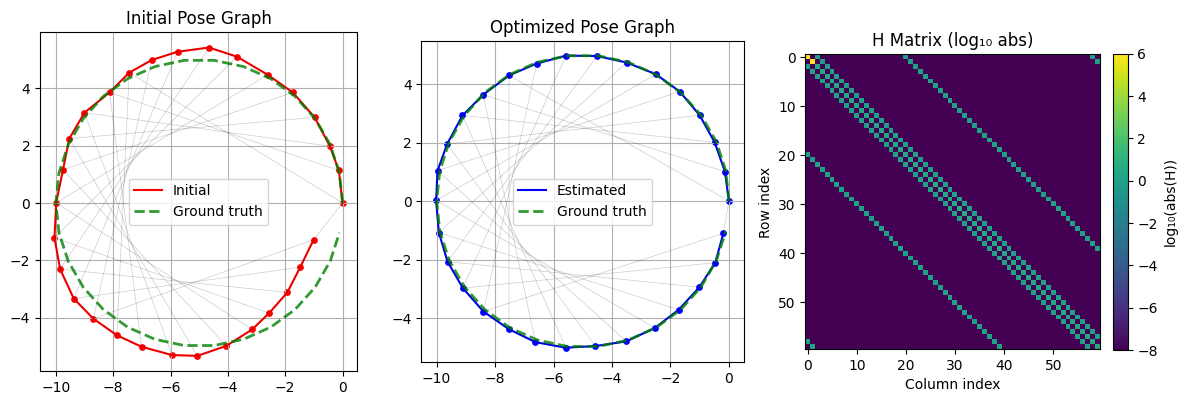

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(10)

# Ground truth setup
N = 30
R = 5.0
theta = np.linspace(0, 2*np.pi, N, endpoint=False)
# Create a circular trajectory
gt = np.stack([R * np.cos(theta), R * np.sin(theta)], axis=1)
gt = gt - gt[0]  # Align ground truth to start at origin

# Graph construction
edges = []

# Odometry (sequential)
for i in range(N - 1):
    j = i + 1
    z = gt[j] - gt[i]
    edges.append((i, j, z))

# Loop closures (i, i+10)
for i in range(N - 10):
    j = i + 10
    z = gt[j] - gt[i]
    edges.append((i, j, z))

# Closing the loop
edges.append((N - 1, 0, gt[0] - gt[N - 1]))

# Add noise to measurements
sigma = 0.05
edges_noisy = [(i, j, z + rng.normal(0, sigma, 2)) for (i, j, z) in edges]

# Initial guess (odometry drift)
x_init = [np.zeros(2)]
for i in range(N - 1):
    z = gt[i+1] - gt[i]
    z_noisy = z + rng.normal(0, 0.1, 2)
    x_init.append(x_init[-1] + z_noisy)
x_init = np.array(x_init)

# --- Compute total error function ---
def compute_total_error(x, edges):
    return sum(0.5 * np.linalg.norm((x[j] - x[i]) - z)**2 for (i, j, z) in edges)

# Gauss-Newton optimization loop
x_est = x_init.copy()
max_iters = 20

for it in range(max_iters):
    # Step 1: Initialize system
    H = np.zeros((2*N, 2*N))
    b = np.zeros((2*N,))

    # Step 2: Loop over edges and accumulate linear system
    for (i, j, z) in edges_noisy:
        e_ij = (x_est[j] - x_est[i]) - z
        J_i = -np.eye(2)
        J_j =  np.eye(2)

        ii = slice(2*i, 2*i+2)
        jj = slice(2*j, 2*j+2)

        H[ii, ii] += J_i.T @ J_i
        H[ii, jj] += J_i.T @ J_j
        H[jj, ii] += J_j.T @ J_i
        H[jj, jj] += J_j.T @ J_j

        b[ii] += J_i.T @ e_ij
        b[jj] += J_j.T @ e_ij

    # Step 3: Fix gauge freedom (anchor node 0)
    H[0:2, 0:2] += np.eye(2) * 1e6
    b[0:2] = 0

    # Step 4: Solve linear system
    dx = -np.linalg.solve(H, b)

    # Step 5: Apply update (skip node 0)
    for k in range(1, N):
        x_est[k] += dx[2*k:2*k+2]

    # Step 6: Compute total error
    cost = compute_total_error(x_est, edges_noisy)
    print(f"Iter {it:02d} | cost={cost:.6f}")

    # Step 7: Check convergence
    if np.linalg.norm(dx) < 1e-6:
        break

# --- Visualization ---
def plot_graph(ax, nodes, edges, title, color='r', gt=None):
    ax.plot(nodes[:,0], nodes[:,1], color=color, lw=1.5, label='Estimated' if color != 'r' else 'Initial')
    ax.scatter(nodes[:,0], nodes[:,1], c=color, s=15)
    for (i, j, _) in edges:
        pi, pj = nodes[i], nodes[j]
        ax.plot([pi[0], pj[0]], [pi[1], pj[1]], 'k-', alpha=0.2, lw=0.5)
    if gt is not None:
        ax.plot(gt[:,0], gt[:,1], 'g--', lw=2, alpha=0.8, label='Ground truth')
    ax.set_title(title)
    ax.set_aspect('equal')
    ax.legend()
    ax.grid(True)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot initial and optimized graphs
plot_graph(ax1, x_init, edges_noisy, "Initial Pose Graph", color='r', gt=gt)
plot_graph(ax2, x_est, edges_noisy, "Optimized Pose Graph", color='b', gt=gt)

# Plot H matrix heatmap
abs_H = np.abs(H)
log_H = np.log10(abs_H + 1e-8)
im = ax3.imshow(log_H, cmap='viridis')
ax3.set_title("H Matrix (log₁₀ abs)")
ax3.set_xlabel("Column index")
ax3.set_ylabel("Row index")
fig.colorbar(im, ax=ax3, fraction=0.046, pad=0.04, label='log₁₀(abs(H))')

plt.tight_layout()
plt.show()

---


### ⏱ <span style="color:#a4d4a3">**Does all that run online?**</span>

…it depends on the <span style="color:#ffa500">**size**</span> of the graph…

At some point, the graph might <span style="color:#ffa500">**grow in size**</span> to the point that the <span style="color:#ffa500">**optimization becomes slower**</span> than the time we need to <span style="color:#ffa500">**add a new node**</span>.

- This limitation leads to the <span style="color:#ffa500">**hierarchical pose graph**</span>.

- Basically, we <span style="color:#ffa500">**do not need all of the nodes**</span> to optimize our graph.

---


## 🪜 <span style="color:#a4d4a3">**Hierarchical Pose Graph**</span>

Nodes can represent <span style="color:#ffa500">**large chunks of nodes**</span> and be optimized as the higher node.

<p align="center">
    <img src="../figures/3_least_squares/slam_course-hierarchical.png" alt="Connected graph" width="580"/>
</p>

<span style="color:#00703c">**Motivation:**</span>

*“There is no need to optimize <span style="color:#ffa500">**the whole graph**</span> when an observation is obtained.”*

- Front-end seeks for loop-closures.

- Requires to compare observations to all previously obtained ones.

- In practice, <span style="color:#ffa500">**limit search to areas**</span> in which the robot is likely to be.

- This requires to know <span style="color:#ffa500">**in which parts of the graph to search for data associations**</span>.

### 🗂️ <span style="color:#a4d4a3">**Hierarchical Approach**</span>

<span style="color:#00703c">**Insight:**</span> 

- To find loop closures, one does not need the perfect global map.

<span style="color:#00703c">**Idea:**</span> 

- Correct only the core structure of the scene, not the overall graph.

- The hierarchical pose-graph is a <span style="color:#ffa500">**sparse approximation**</span> of the original problem.

It exploits the fact that in SLAM:

  - The robot moves through the scene and is <span style="color:#ffa500">**not** ***“teleported”***</span> to locations.

  - Sensors have a <span style="color:#ffa500">**limited range**</span>.

#### 🔑 <span style="color:#a4d4a3">**Key Idea of the Hierarchy**</span>

The key idea of the hierarchy is as follows:

- Input is the dense graph.

- <span style="color:#ffa500">**Group the nodes**</span> of the graph based on their <span style="color:#ffa500">**local connectivity**</span>.

- For each group, select one node as a <span style="color:#ffa500">***“representative”***</span>.

<p align="center">
    <img src="../figures/3_least_squares/slam_course-hierarchichal_graph.png" alt="Hierarchical graph" width="520"/>
</p>

- The representatives are the nodes in a <span style="color:#ffa500">**new sparsified graph**</span> (upper level).

<p align="center">
    <img src="../figures/3_least_squares/slam_course-hierarchical_reduction.png" alt="Hierarchical graph" width="520"/>
</p>

- <span style="color:#ffa500">**Edges**</span> of the sparse graph are determined by the <span style="color:#ffa500">**connectivity**</span> of the groups of nodes.

- The parameters of the sparse edges are estimated via <span style="color:#ffa500">**local optimization**</span>.

- Process is repeated <span style="color:#ffa500">**recursively.**</span>

We need to keep in mind that:

- Only the <span style="color:#ffa500">**upper level**</span> of the hierarchy is <span style="color:#ffa500">**optimized completely**</span>.

<p align="center">
    <img src="../figures/3_least_squares/slam_course-upper_nodes_plus.png" alt="Hierarchical graph" width="180"/>
</p>

- The changes are <span style="color:#ffa500">**propagated**</span> to the bottom levels <span style="color:#ffa500">**only close**</span> to the current robot position.

- Only this part of the graph is relevant for finding constraints.

> 📝 <span style="color:#0098ff">**Note:**</span> <em> The fact that we keep only a portion of the nodes and edges makes it an approximation, which still is very close to the original.</em>


#### 🏗️ <span style="color:#a4d4a3">**Construction of the Hierarchy**</span>

<span style="color:#ffa500">**When**</span> and <span style="color:#ffa500">**how**</span> to generate a new group?

  - A (simple) <span style="color:#ffa500">**distance-based**</span> decision.

  - The <span style="color:#ffa500">**first**</span> node of a new group is the <span style="color:#ffa500">**representative**</span>.

When to <span style="color:#ffa500">**propagate**</span> information <span style="color:#ffa500">**downwards**</span>?

  - Only when there are <span style="color:#ffa500">**inconsistencies**</span>.

##### <span style="color:#a4d4a3">Determining Edge Parameters</span>

Given two connected groups, <span style="color:#ffa500">**how**</span> to compute a <span style="color:#ffa500">**virtual observation**</span> $\mathbf{z}$ and the <span style="color:#ffa500">**information matrix**</span> $\mathbf{\Omega}$ for the new edge?

<p align="center">
    <img src="../figures/3_least_squares/slam_course-virtual_measurement.png" alt="Virtual Measurement" width="280"/>
</p>

- Optimize the two sub-groups <span style="color:#ffa500">**jointly**</span> but <span style="color:#ffa500">**independently**</span> from the rest.

<p align="center">
    <img src="../figures/3_least_squares/slam_course-fixed_virtual_measurement.png" alt="Fixed Virtual Measurement" width="280"/>
</p>

- The observation is the <span style="color:#ffa500">**relative transformation**</span> between the two representatives.

- The information matrix is computed from the <span style="color:#ffa500">**diagonal block of the matrix**</span> $\mathbf{H}$.

$$
\mathbf{\Omega}_{a b} = (\mathbf{H}_{[b,b]}^{-1})^{-1}
$$

Basically, we fix $\mathbf{x}_a$ and compute where $\mathbf{x}_b$ relative to $\mathbf{x}_a$. To do that, we invert $\mathbf{H}$, we cut out the $[b,b]$ block and then invert it back.

##### <span style="color:#a4d4a3">Propagating Information Downwards</span>

All representatives are nodes from the <span style="color:#ffa500">**lower**</span> (bottom) <span style="color:#ffa500">**level**</span>.

- Information is <span style="color:#ffa500">**propagated downwards**</span> by transforming the group at the lower level using a <span style="color:#ffa500">**rigid body transformation**</span>.

- <span style="color:#ffa500">**Only**</span> if the lower level becomes <span style="color:#ffa500">**inconsistent**</span>, <span style="color:#ffa500">**optimize the lower level**</span>.

<p align="center">
    <img src="../figures/3_least_squares/slam_course-fixed_plus.png" alt="Fixed" width="360"/>
</p>

##### <span style="color:#a4d4a3">For the Best Possible Map</span>

For the <span style="color:#ffa500">**Best Possible Map**</span>:

- Run the optimization on the lowest level (at the end).

- For <span style="color:#ffa500">**offline processing**</span> with all constraints, the hierarchy <span style="color:#ffa500">**helps convergence faster**</span> in case of large errors.

- In this case, one pass up the tree (to construct the edges) followed by one pass down the tree is sufficient.

#### 📈 <span style="color:#a4d4a3">**Consistency**</span>

How well does the top level in the hierarchy <span style="color:#ffa500">**represent the original input**</span>?

- To check how well our approximation is we can compute the probability mass of the <span style="color:#ffa500">**marginal distribution**</span> in the highest level vs. the one of the true estimated (original problem, lowest level).

---

##### 📈 `Python Example #2: Hierarchical 2D Pose Graph Optimization`

In this section we walk through a <span style="color:#ffa500">**hierarchical 2D pose graph optimization**</span> example based on <span style="color:#ffa500">**submaps**</span>. We split a longer trajectory into local chunks, optimize each chunk independently, and then perform a global pass that stitches everything together using longer-range constraints. This mirrors practical SLAM systems where local mapping is fast and global alignment removes residual drift.

The example code below goes through the following steps:

1. We sample $N$ poses on a circle of radius $R$ and shift so the first node is at the origin. The trajectory is partitioned into `NUM_SUBMAPS` equal segments, each defining a submap with `nodes_per_submap = N / NUM_SUBMAPS`.

2. Edge Construction (Local vs. Global):  
   - Local odometry edges connect $i \rightarrow j = i+1$ *within the same submap*, capturing short-range sequential motion.  
   - Global edges capture constraints that span <span style="color:#ffa500">**across**</span> submaps, both odometry edges that cross a boundary and deliberate <span style="color:#ffa500">**loop-closure**</span> links (e.g., $i \rightarrow i+30$).  
   - A final loop-closure $(N-1) \rightarrow 0$ closes the ring.  
   
   Splitting edges into local and global allows us to <span style="color:#ffa500">**optimize locally first, then refine globally**</span>.

3. Each relative measurement $z_{ij}$ is perturbed with small Gaussian noise to mimic real sensors. We build noisy local and noisy global edge sets, the optimizer only sees these noisy constraints.

4. Starting at the origin, we integrate <span style="color:#ffa500">**noisy**</span> odometry forward to obtain $x_{\text{init}}$. This accumulates error and produces visible <span style="color:#ffa500">**drift**</span> along the loop.

5. For any set of edges, we solve a non-linear least squares problem with Gauss-Newton:
   - Residual for each edge $(i,j)$: $e_{ij} = (x_j - x_i) - z_{ij}$.  
   - Linearize with constant Jacobians $\, J_i = -I$, $J_j = I$ (translation-only model), and accumulate the normal equations $\, H \Delta x = -b$.  
   - Gauge freedom: anchor node $0$ (strong prior or fix $\, \Delta x_0=0$) to establish a <span style="color:#ffa500">**reference frame**</span>.  
   - Solve, update, and iterate until convergence or a max-iteration cap.

6. <span style="color:#ffa500">**Level 0 — Per-Submap Optimization**</span>: Optimize <span style="color:#ffa500">**each submap independently**</span> using only its <span style="color:#ffa500">**local edges**</span>. Edges are <span style="color:#ffa500">**reindexed**</span> into the submap’s local node indices; the optimized submap result is then <span style="color:#ffa500">**written back**</span> into the global trajectory, yielding $x_{\text{level0}}$. This step reduces local drift while keeping computation <span style="color:#ffa500">**fast and parallelizable**</span>.

7. <span style="color:#ffa500">**Level 1 — Global Optimization (Full Graph)**</span>: Starting from $x_{\text{level0}}$, run the same Gauss–Newton optimizer over <span style="color:#ffa500">**all nodes**</span> with <span style="color:#ffa500">**all edges**</span> (local + global). The longer-range constraints and loop closures <span style="color:#ffa500">**align submaps and remove residual drift**</span>, producing the final estimate $x_{\text{final}}$.

8. Visualization: Three views highlight the hierarchical effect:
   - Initial (Local only): drifted odometry trajectory with only local constraints.  
   - Level 0 (Local submaps): after per-submap refinement, local shape improves but global misalignment may remain.  
   - Level 1 (Full graph): a globally consistent trajectory after stitching with global edges and loop closures.

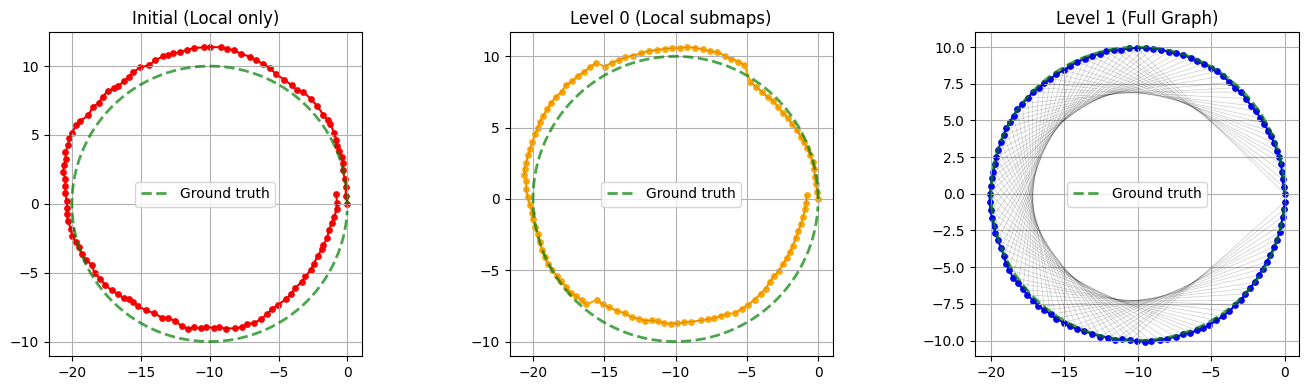

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(10)

# Parameters and ground truth
N = 120  # more nodes
R = 10.0
theta = np.linspace(0, 2*np.pi, N, endpoint=False)
gt = np.stack([R * np.cos(theta), R * np.sin(theta)], axis=1)
gt = gt - gt[0]  # align first node to origin

NUM_SUBMAPS = 6
nodes_per_submap = N // NUM_SUBMAPS

# Edge construction (local + global)
edges_local = []
edges_global = []

# Odometry within submaps
for i in range(N - 1):
    j = i + 1
    z = gt[j] - gt[i]
    if i // nodes_per_submap == j // nodes_per_submap:
        edges_local.append((i, j, z))
    else:
        edges_global.append((i, j, z))  # edge crosses submap

# Loop closures between submaps (e.g. i, i+30)
for i in range(N - 30):
    j = i + 30
    z = gt[j] - gt[i]
    edges_global.append((i, j, z))

# Final loop closure
edges_global.append((N-1, 0, gt[0] - gt[N-1]))

# Noisy measurements
sigma = 0.05
edges_local_noisy  = [(i, j, z + rng.normal(0, sigma, 2)) for (i, j, z) in edges_local]
edges_global_noisy = [(i, j, z + rng.normal(0, sigma, 2)) for (i, j, z) in edges_global]
edges_all = edges_local_noisy + edges_global_noisy

# Initial guess (odometry drift)
x_init = [np.zeros(2)]
for i in range(N - 1):
    z = gt[i+1] - gt[i] + rng.normal(0, 0.1, 2)
    x_init.append(x_init[-1] + z)
x_init = np.array(x_init)

# Gauss-Newton Optimizer (can reuse for all levels)
def optimize_pose_graph(x_init, edges, max_iters=20):
    N = len(x_init)
    x = x_init.copy()

    for it in range(max_iters):
        H = np.zeros((2*N, 2*N))
        b = np.zeros((2*N,))

        for (i, j, z) in edges:
            e = (x[j] - x[i]) - z
            Ji = -np.eye(2)
            Jj =  np.eye(2)

            ii = slice(2*i, 2*i+2)
            jj = slice(2*j, 2*j+2)

            H[ii, ii] += Ji.T @ Ji
            H[ii, jj] += Ji.T @ Jj
            H[jj, ii] += Jj.T @ Ji
            H[jj, jj] += Jj.T @ Jj

            b[ii] += Ji.T @ e
            b[jj] += Jj.T @ e

        H[0:2, 0:2] += np.eye(2) * 1e6
        b[0:2] = 0

        dx = -np.linalg.solve(H, b)

        for k in range(1, N):
            x[k] += dx[2*k:2*k+2]

        if np.linalg.norm(dx) < 1e-6:
            break

    return x, H

# Level 0 Optimization (each submap independently)
x_level0 = x_init.copy()
for sm in range(NUM_SUBMAPS):
    start = sm * nodes_per_submap
    end = (sm + 1) * nodes_per_submap

    # Get local edges and reindex them to local submap coordinates
    sub_edges_global = [e for e in edges_local_noisy if start <= e[0] < end and start <= e[1] < end]
    sub_edges_local = [(i - start, j - start, z) for (i, j, z) in sub_edges_global]

    # Optimize submap locally
    x_submap = x_level0[start:end]
    x_submap_opt, _ = optimize_pose_graph(x_submap, sub_edges_local)

    # Update global trajectory with local optimized result
    x_level0[start:end] = x_submap_opt


# Level 1 Optimization (all nodes, all edges)
x_final, H_final = optimize_pose_graph(x_level0, edges_all)

# --- Visualization ---
def plot_graph(ax, nodes, edges, title, color='r', gt=None):
    ax.plot(nodes[:,0], nodes[:,1], color=color, lw=1.5)
    ax.scatter(nodes[:,0], nodes[:,1], c=color, s=15)
    for (i, j, _) in edges:
        pi, pj = nodes[i], nodes[j]
        ax.plot([pi[0], pj[0]], [pi[1], pj[1]], 'k-', alpha=0.2, lw=0.5)
    if gt is not None:
        ax.plot(gt[:,0], gt[:,1], 'g--', lw=2, alpha=0.7, label='Ground truth')
    ax.set_title(title)
    ax.set_aspect('equal')
    ax.grid(True)
    if gt is not None: ax.legend()

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

plot_graph(axes[0], x_init, edges_local_noisy, "Initial (Local only)", 'r', gt)
plot_graph(axes[1], x_level0, edges_local_noisy, "Level 0 (Local submaps)", 'orange', gt)
plot_graph(axes[2], x_final, edges_all, "Level 1 (Full Graph)", 'b', gt)
plt.tight_layout()
plt.show()

---

##### 🕹️ `Python example #3: Interactive Grid Pose-Graph SLAM`

This section introduces an interactive <span style="color:#ffa500">**Grid-based SLAM**</span> demo that combines a probabilistic occupancy grid with <span style="color:#ffa500">**pose-graph optimization (Gauss-Newton)**</span> and lightweight <span style="color:#ffa500">**loop closures**</span>. You drive a robot in the familiar 2D floor plan, the simulator casts 360° LiDAR beams like previous examples, updates a log-odds grid map, and continuously optimizes a pose graph to reduce drift.

1. <span style="color:#00703c">**Probabilistic Grid Mapping (Log-Odds):**</span>
   - The grid has cell size `cell_size` and stores <span style="color:#ffa500">**log-odds**</span> $L$. We update along each beam using:  
     - <span style="color:#ffa500">**Free space**</span> increments for cells strictly before the hit,  
     - <span style="color:#ffa500">**Occupied**</span> increments around the hit within a small radius window $R_{\tfrac{1}{2}}$.  
   - Increments are derived from $p_0, p_{\text{free}}, p_{\text{hit}}$ and are <span style="color:#ffa500">**clipped**</span> to $\pm\,$ `lo_max` to remain numerically stable.  
   - Two knobs for making it more lightweight: `map_beam_subsample` (use every k-th beam) and `update_stride_px` (skip along the ray).

2. <span style="color:#00703c">**Keyboard Odometry & Scan Loop:**</span>  
   - Each key press issues a motion command $[dr_1, dt, dr_2]$ and updates the <span style="color:#ffa500">**GT pose**</span> via a unicycle-style odometry model.  
   - The <span style="color:#ffa500">**pose graph**</span> simultaneously appends a new node and an  <span style="color:#ffa500">**odometry edge**</span> encoding the relative motion in the previous node’s frame.  
   - A periodic scan event (every `scan_ms` ms) casts rays from the <span style="color:#ffa500">**GT**</span> pose, converts each beam angle to the <span style="color:#ffa500">**current estimated**</span> pose frame, and  <span style="color:#ffa500">**updates the grid**</span> with log-odds along the beam.

3. <span style="color:#00703c">**Pose-Graph SLAM (Gauss–Newton with Loop Closures):**</span>  
   - <span style="color:#ffa500">**Nodes:**</span> $(x,y,\theta)$ for each step; <span style="color:#ffa500">**Edges:**</span> odometry + opportunistic <span style="color:#ffa500">**loop closures**</span> added when the newest node is spatially close (within `loop_thresh_px`) to a sufficiently older node (`loop_min_sep`).  
   - For an edge $(i,j)$ with measurement $z$, the <span style="color:#ffa500">**residual**</span> is:
     $$
     e_{ij} = 
     \begin{bmatrix}
       R(\theta_i)^\top\,(p_j - p_i) - z_{xy} \\
       \operatorname{wrap}((\theta_j - \theta_i) - z_\theta)
     \end{bmatrix},
     $$
     and Jacobians $A, B$ are assembled to form the normal system $H\Delta x=-b$.  
   - <span style="color:#ffa500">**Gauge fixing:**</span> the first node is anchored (zero increment) to remove global translational/rotational ambiguity.  
   - After solving, increments are applied and angles are wrapped to $(-\pi,\pi]$.

In [ ]:
# ==========================================================
# Grid Pose-Graph SLAM (GT left | Grid + Graph right)
# Gauss-Newton optimization with loop closures
# ==========================================================

import sys
import numpy as np
import pygame

# --- Small helpers ---
def wrap_angle(a: float) -> float:
    return (a + np.pi) % (2*np.pi) - np.pi

def logit(p: float, eps=1e-6) -> float:
    p = np.clip(p, eps, 1 - eps) 
    return np.log(p/(1 - p))

def i2(p):  # int tuple
    return (int(p[0]), int(p[1]))

# --- Config ---
class Config:
    # Window/panels
    panel_w, panel_h = 500, 400
    window_size = (panel_w*2, panel_h)

    # LiDAR / visualization
    num_beams    = 360
    fov_deg      = 360
    scan_ms      = 200
    max_range_px = 300
    traj_max     = 500

    # Discretization / grid map
    cell_size   = 4           # pixels per cell
    lo_max      = 4.0         # clamp log-odds
    p0          = 0.5
    p_free      = 0.30
    p_hit       = 0.70
    r_window_cells = 2
    update_stride_px = 2
    map_beam_subsample = 4

    # Motion (keyboard odometry: [dr1, dt, dr2])
    trans_step = 12.0
    rot_step   = np.deg2rad(12.0)
    odom_noise = np.array([0.1, 0.2, 0.05], dtype=np.float32)

    # Pose-graph / optimization
    prior_w = 1e4
    edge_w  = 1.0
    loop_thresh_px = 25.0
    loop_min_sep   = 30
    gn_iters_per_scan = 5

    # Floor plan path (environment oracle)
    floor_img_path = "../figures/floor_plan.png"

# --- Map & LiDAR helpers (Map2D, cast_scan_vectorized) --
class Map2D:
    def __init__(self, panel_w:int, panel_h:int, floor_img_path:str, ray_stride:int=2):
        self.ray_stride = ray_stride
        surf0 = pygame.image.load(floor_img_path)
        w0,h0 = surf0.get_size()
        s = min(panel_w/w0, panel_h/h0)
        self.w, self.h = int(w0*s), int(h0*s)
        self.surface = pygame.transform.smoothscale(surf0, (self.w, self.h))
        arr = pygame.surfarray.array3d(self.surface)
        # Dark = wall
        self.wall_mask = np.all(arr < 128, axis=2)

    def nearest_free_to(self, p: tuple) -> tuple:
        x0,y0 = int(p[0]), int(p[1])
        x0 = np.clip(x0, 0, self.w-1); y0 = np.clip(y0, 0, self.h-1)
        if not self.wall_mask[x0,y0]: return (x0,y0)
        for r in range(1, max(self.w, self.h)):
            for x in np.clip([x0-r, x0, x0+r], 0, self.w-1):
                for y in np.clip([y0-r, y0, y0+r], 0, self.h-1):
                    if not self.wall_mask[x,y]: return (int(x),int(y))
        return (x0,y0)

def cast_scan_vectorized(origin_xy: np.ndarray,
                         beam_angles_world: np.ndarray,
                         wall_mask: np.ndarray,
                         max_range_px: int,
                         ray_stride: int) -> tuple:
    B = beam_angles_world.size
    S = int(max_range_px // ray_stride) + 1
    r = (np.arange(S, dtype=np.float32) * float(ray_stride))[None, :]  # (1,S)

    ang = beam_angles_world[:, None]           # (B,1)
    X = origin_xy[0] + r * np.cos(ang)         # (B,S)
    Y = origin_xy[1] + r * np.sin(ang)         # (B,S)
    X = X.astype(np.int32); Y = Y.astype(np.int32)

    W, H = wall_mask.shape[0], wall_mask.shape[1]
    oob = (X < 0) | (X >= W) | (Y < 0) | (Y >= H)
    inb = ~oob
    wall = np.zeros_like(oob, dtype=bool)
    if np.any(inb):
        wall[inb] = wall_mask[X[inb], Y[inb]]

    hit = oob | wall
    has_hit = np.any(hit, axis=1)
    first_idx = np.argmax(hit, axis=1)  # 0 if none; guard with has_hit
    ranges = np.where(has_hit, r.squeeze()[first_idx], float(max_range_px))
    return ranges.astype(np.float32), has_hit

# --- Grid update / rendering (vectorized, style-matched) ---
def p_occ_beam_vec(r: np.ndarray, z: float, hit_exists: bool, R_HALF: float,
                   P0: float, P_FREE: float, P_HIT: float) -> np.ndarray:
    if hit_exists:
        free_mask = (r < z - R_HALF)
        occ_mask  = (r <= z + R_HALF) & ~free_mask
    else:
        free_mask = (r < z)
        occ_mask  = np.zeros_like(free_mask)
    dL = np.zeros_like(r, dtype=np.float32)
    if np.any(free_mask):
        p = P_FREE; dL[free_mask] = (np.log(p/(1-p)) - np.log(P0/(1-P0)))
    if np.any(occ_mask):
        p = P_HIT;  dL[occ_mask]  = (np.log(p/(1-p)) - np.log(P0/(1-P0)))
    return dL

def update_grid_beam_vectorized(robot_xy: np.ndarray, global_angle: float,
                                z_meas: float, hit_exists: bool,
                                logodds: np.ndarray, w: int, h: int,
                                GW: int, GH: int, CELL_SIZE: int,
                                R_HALF: float, LO_MAX: float,
                                P0: float, P_FREE: float, P_HIT: float,
                                stride_px: int):
    r_end = int(min(z_meas + (R_HALF if hit_exists else 0.0), np.hypot(w, h)))
    if r_end <= 0: return
    r = np.arange(0, r_end, max(1, int(stride_px)), dtype=np.float32)   # (S,)

    xs = (robot_xy[0] + r * np.cos(global_angle)).astype(np.int32)
    ys = (robot_xy[1] + r * np.sin(global_angle)).astype(np.int32)
    valid = (xs >= 0) & (xs < w) & (ys >= 0) & (ys < h)
    if not np.any(valid): return
    xs, ys, r = xs[valid], ys[valid], r[valid]

    gxs = xs // CELL_SIZE; gys = ys // CELL_SIZE
    gv = (gxs >= 0) & (gxs < GW) & (gys >= 0) & (gys < GH)
    if not np.any(gv): return
    gxs, gys, r = gxs[gv], gys[gv], r[gv]

    keep = np.ones(gxs.size, dtype=bool)
    keep[1:] = (gxs[1:] != gxs[:-1]) | (gys[1:] != gys[:-1])
    gxs, gys, r = gxs[keep], gys[keep], r[keep]

    dL = p_occ_beam_vec(r, float(z_meas), bool(hit_exists), R_HALF, P0, P_FREE, P_HIT)
    if not np.any(dL): return

    np.add.at(logodds, (gxs, gys), dL)
    logodds[gxs, gys] = np.clip(logodds[gxs, gys], -LO_MAX, LO_MAX)

def render_logodds_surface(logodds: np.ndarray, GW: int, GH: int, CELL_SIZE: int) -> pygame.Surface:
    p = 1.0/(1.0 + np.exp(-logodds))
    gray = (255.0 * (1.0 - p)).astype(np.uint8)  # free=white, occ=dark
    rgb  = np.dstack([gray, gray, gray])
    surf = pygame.surfarray.make_surface(rgb)
    return pygame.transform.scale(surf, (GW*CELL_SIZE, GH*CELL_SIZE))

# --- Pose-Graph SLAM (Gauss-Newton) ---
class PoseGraphSLAM:
    def __init__(self, cfg: Config, map_w: int, map_h: int):
        self.cfg = cfg
        cs = cfg.cell_size
        self.GW = (map_w + cs - 1) // cs
        self.GH = (map_h + cs - 1) // cs
        self.L  = np.full((self.GW, self.GH), logit(cfg.p0), dtype=np.float32)
        self.poses = []       # list of (x,y,th)
        self.edges = []       # list of (i,j,rel_ij)
        self.prior_w = float(cfg.prior_w)
        self.edge_w  = float(cfg.edge_w)

    # --- graph helpers ---
    @staticmethod
    def _rel(pi, pj):
        dx, dy = pj[0]-pi[0], pj[1]-pi[1]
        c, s   = np.cos(pi[2]), np.sin(pi[2])
        return np.array([ c*dx + s*dy, -s*dx + c*dy, wrap_angle(pj[2]-pi[2]) ], dtype=np.float32)

    @staticmethod
    def _err_jac(pi, pj, z):
        c, s = np.cos(pi[2]), np.sin(pi[2])
        R    = np.array([[c, s], [-s, c]], dtype=np.float32)  # world -> frame i
        d    = pj[:2] - pi[:2]
        dt   = R @ d
        dth  = wrap_angle(pj[2] - pi[2])
        e    = np.array([dt[0] - z[0], dt[1] - z[1], wrap_angle(dth - z[2])], np.float32)

        A = np.zeros((3, 3), np.float32)
        B = np.zeros((3, 3), np.float32)

        A[:2, :2] = -R
        S = np.array([[0.0, 1.0], [-1.0, 0.0]], np.float32)  # +S (note)
        A[:2, 2]  = (R @ S) @ d
        A[2, 2]   = -1.0

        B[:2, :2] =  R
        B[2, 2]   =  1.0
        return e, A, B

    def _add_edge_once(self, i, j, z):
        for ei,ej,_ in self.edges:
            if ei==i and ej==j:
                return
        self.edges.append((i,j,z))

    def init_pose(self, x: float, y: float, th: float):
        self.poses = [np.array([x,y,th], dtype=np.float32)]

    def predict_pose(self, u):
        dr1, dt, dr2 = u
        x,y,th = self.poses[-1]
        th1 = th + dr1
        return np.array([x + dt*np.cos(th1),
                         y + dt*np.sin(th1),
                         wrap_angle(th1 + dr2)], dtype=np.float32)

    def predict_step(self, u):
        sig = self.cfg.odom_noise.astype(np.float32)
        n = np.random.normal(0.0, sig, size=3).astype(np.float32)
        u_meas = u + n  

        new = self.predict_pose(u)
        i = len(self.poses) - 1
        j = i + 1
        self.poses.append(new)
        # odom edge: relative motion in node-i frame -> [dt, 0, dr1+dr2]
        self._add_edge_once(i, j, np.array([u[1], 0.0, u[0] + u[2]], dtype=np.float32))

    def loop_close(self, thresh_px: float, min_sep: int):
        j = len(self.poses) - 1
        if j < min_sep: return
        pj = self.poses[j]
        for k in range(j - min_sep):
            if np.linalg.norm(pj[:2] - self.poses[k][:2]) < thresh_px:
                self._add_edge_once(k, j, self._rel(self.poses[k], pj))
                break

    def optimize(self, iters: int):
        n = len(self.poses)
        if n < 2: return
        for _ in range(max(1, int(iters))):
            H = np.zeros((3*n, 3*n), np.float32)
            b = np.zeros(3*n, np.float32)

            # Soft prior on first node (optional; we also gauge-fix below)
            H[:3, :3] += self.prior_w * np.eye(3, dtype=np.float32)

            for i, j, z in self.edges:
                e, A, B = self._err_jac(self.poses[i], self.poses[j], z)
                ii = slice(3*i, 3*i+3); jj = slice(3*j, 3*j+3)
                ew = self.edge_w
                H[ii, ii] += ew * (A.T @ A)
                H[ii, jj] += ew * (A.T @ B)
                H[jj, ii] += ew * (B.T @ A)
                H[jj, jj] += ew * (B.T @ B)
                b[ii]     += ew * (A.T @ e)
                b[jj]     += ew * (B.T @ e)

            dx = np.linalg.solve(H, -b)

            # Gauge fix: freeze first node increment
            dx[0:3] = 0.0

            for k in range(n):
                self.poses[k] += dx[3*k:3*k+3]
                self.poses[k][2] = wrap_angle(float(self.poses[k][2]))

# --- UI helpers (Panel) ---
class Panel:
    def __init__(self, screen, rect): self.screen, self.rect = screen, rect
    @property
    def ox(self): return self.rect[0]
    def clear(self, color):
        pygame.draw.rect(self.screen, color, self.rect)
        pygame.draw.rect(self.screen, (200,200,200), self.rect, 2)
    def blit(self, surf, at=(0,0)):
        x,y,_,_ = self.rect; self.screen.blit(surf, (x+at[0], y+at[1]))
    def polygon(self, color, pts):
        x,y,_,_ = self.rect; P = [(x+int(px), y+int(py)) for (px,py) in pts]
        pygame.draw.polygon(self.screen, color, P)
    def circle(self, color, p, r, width=0):
        x,y,_,_ = self.rect
        pygame.draw.circle(self.screen, color, (x+int(p[0]), y+int(p[1])), int(r), width)
    def line(self, color, p0, p1, w=1):
        x,y,_,_ = self.rect; pygame.draw.line(self.screen, color, (x+int(p0[0]), y+int(p0[1])), (x+int(p1[0]), y+int(p1[1])), w)
    def text(self, font, s, color, pos):
        x,y,_,_ = self.rect; self.screen.blit(font.render(s, True, color), (x+pos[0], y+pos[1]))

# --- App --- 
class App:
    def __init__(self, cfg: Config):
        pygame.init()
        self.cfg = cfg
        self.screen = pygame.display.set_mode(cfg.window_size)
        pygame.display.set_caption("GT (left) | Grid Pose-Graph SLAM (right)")
        self.clock = pygame.time.Clock()
        self.font  = pygame.font.SysFont(None, 18)

        # Panels
        self.left  = Panel(self.screen, (0, 0, cfg.panel_w, cfg.panel_h))
        self.right = Panel(self.screen, (cfg.panel_w, 0, cfg.panel_w, cfg.panel_h))

        # Map + LiDAR oracle
        self.map = Map2D(cfg.panel_w, cfg.panel_h, cfg.floor_img_path, ray_stride=2)

        # Pose-graph + grid map
        self.pg = PoseGraphSLAM(cfg, self.map.w, self.map.h)

        # Start at center (nearest free)
        cx, cy = cfg.panel_w//2, cfg.panel_h//2
        gx, gy = self.map.nearest_free_to((cx, cy))
        self.gt_pose = np.array([gx, gy, 0.0], dtype=np.float32)
        self.pg.init_pose(gx, gy, 0.0)

        # Trajectories
        self.gt_traj = [self.gt_pose.copy()]

        # Scan timer
        self.SCAN_EVENT = pygame.USEREVENT + 1
        pygame.time.set_timer(self.SCAN_EVENT, cfg.scan_ms)

        # Precompute scan angles (world frame)
        self.angles_world = np.linspace(0, 2*np.pi, cfg.num_beams, endpoint=False)

    # --- Motion model (same style as uploaded file) ---
    @staticmethod
    def motion_model_odometry(u, x_prev: np.ndarray) -> np.ndarray:
        dr1, dt, dr2 = u
        x_new = x_prev[0] + dt*np.cos(x_prev[2] + dr1)
        y_new = x_prev[1] + dt*np.sin(x_prev[2] + dr1)
        th_new= wrap_angle(x_prev[2] + dr1 + dr2)
        return np.array([x_new, y_new, th_new], dtype=np.float32)

    def step_motion(self, cmd):
        self.gt_pose = self.motion_model_odometry(cmd, self.gt_pose)
        self.gt_traj.append(self.gt_pose.copy())
        self.gt_traj = self.gt_traj[-self.cfg.traj_max:]
        # Add odom edge & node
        self.pg.predict_step(cmd)

    def step_scan(self):
        # Vectorized scan from GT using floor-plan oracle
        ranges, _ = cast_scan_vectorized(self.gt_pose[:2], self.angles_world,
                                         self.map.wall_mask, self.cfg.max_range_px,
                                         ray_stride=self.map.ray_stride)
        phis = wrap_angle(self.angles_world - self.gt_pose[2])

        # Grid update at current estimated node (last pose in graph)
        cs = self.cfg.cell_size
        R_HALF = (self.cfg.r_window_cells * cs) / 2.0
        x,y,th = map(float, self.pg.poses[-1])
        for k in range(0, self.cfg.num_beams, max(1, int(self.cfg.map_beam_subsample))):
            dist = float(ranges[k])
            hit_exists = (dist < self.cfg.max_range_px - 1e-3)
            g_ang = th + float(phis[k])
            update_grid_beam_vectorized(
                np.array([x,y], dtype=np.float32), g_ang, dist, hit_exists,
                self.pg.L, self.map.w, self.map.h, self.pg.GW, self.pg.GH, cs,
                R_HALF, self.cfg.lo_max, self.cfg.p0, self.cfg.p_free, self.cfg.p_hit,
                stride_px=self.cfg.update_stride_px
            )

        # Loop closure + Gauss-Newton
        self.pg.loop_close(self.cfg.loop_thresh_px, self.cfg.loop_min_sep)
        self.pg.optimize(self.cfg.gn_iters_per_scan)

    # --- Drawing ---
    def draw_left(self):
        self.left.clear((30,30,30))
        self.left.blit(self.map.surface, (0,0))
        if len(self.gt_traj) >= 2:
            for i in range(1, len(self.gt_traj)):
                p0 = i2(self.gt_traj[i-1][:2]); p1 = i2(self.gt_traj[i][:2])
                pygame.draw.line(self.screen, (0,150,255), (self.left.ox+p0[0], p0[1]),
                                 (self.left.ox+p1[0], p1[1]), 2)
        gx,gy,gth = map(float, self.gt_pose)
        pts = [
            (gx + 15*np.cos(gth),     gy + 15*np.sin(gth)),
            (gx + 10*np.cos(gth+2.5), gy + 10*np.sin(gth+2.5)),
            (gx + 10*np.cos(gth-2.5), gy + 10*np.sin(gth-2.5))
        ]
        self.left.polygon((0,150,255), pts)

    def draw_right(self):
        self.right.clear((255,255,255))
        grid_surface = render_logodds_surface(self.pg.L, self.pg.GW, self.pg.GH, self.cfg.cell_size)
        self.right.blit(grid_surface, (0,0))

        # Draw edges & nodes of the pose graph
        if len(self.pg.poses) >= 2:
            for (i,j,_) in self.pg.edges:
                p0 = self.pg.poses[i][:2]; p1 = self.pg.poses[j][:2]
                self.right.line((10,10,10), p0, p1, 1)
        for p in self.pg.poses:
            self.right.circle((0,120,255), (float(p[0]), float(p[1])), 3)

        # HUD
        fps = self.clock.get_fps()
        hud = (f"FPS:{fps:4.1f} | Nodes:{len(self.pg.poses)} | Edges:{len(self.pg.edges)} | "
               f"Beams:{self.cfg.num_beams}/MAP:{self.cfg.map_beam_subsample} | "
               f"Cell:{self.cfg.cell_size}px")
        self.right.text(self.font, hud, (50,80,10), (10,0))

    def run(self):
        running = True
        while running:
            self.clock.tick(30)
            for ev in pygame.event.get():
                if ev.type == pygame.QUIT:
                    running = False
                elif ev.type == pygame.KEYDOWN:
                    cmd = None
                    if   ev.key == pygame.K_UP:    cmd = np.array([0.0, self.cfg.trans_step, 0.0], dtype=np.float32)
                    elif ev.key == pygame.K_LEFT:  cmd = np.array([-self.cfg.rot_step, 0.0, 0.0], dtype=np.float32)
                    elif ev.key == pygame.K_RIGHT: cmd = np.array([ self.cfg.rot_step, 0.0, 0.0], dtype=np.float32)
                    elif ev.key == pygame.K_s:
                        surf = render_logodds_surface(self.pg.L, self.pg.GW, self.pg.GH, self.cfg.cell_size)
                        out = "grid_posegraph_map.png"
                        pygame.image.save(surf, out); print(f"[saved] {out}")
                    elif ev.key == pygame.K_g:
                        cx, cy = self.cfg.panel_w//2, self.cfg.panel_h//2
                        gx, gy = self.map.nearest_free_to((cx, cy))
                        self.pg = PoseGraphSLAM(self.cfg, self.map.w, self.map.h)
                        self.pg.init_pose(gx, gy, 0.0)
                    elif ev.key == pygame.K_k:
                        cx, cy = self.cfg.panel_w//2, self.cfg.panel_h//2
                        gx, gy = self.map.nearest_free_to((cx, cy))
                        self.gt_pose  = np.array([gx, gy, 0.0], dtype=np.float32)
                  R      self.pg.poses[-1] = self.gt_pose.copy()
                        self.gt_traj.clear(); self.gt_traj.append(self.gt_pose.copy())
                    if cmd is not None:
                        self.step_motion(cmd)
                elif ev.type == self.SCAN_EVENT:
                    self.step_scan()

            self.draw_left(); self.draw_right(); pygame.display.flip()

        pygame.quit(); sys.exit()

# --- Run ---
if __name__ == "__main__":
    cfg = Config()
    App(cfg).run()


SystemExit: 

/home/niksta/Documents/Projects/a-brief-slam-summary/slam/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


---


#### ✔️ <span style="color:#a4d4a3">Conclusions</span>

- The <span style="color:#ffa500">**back-end**</span> part of the SLAM problem can be effectively <span style="color:#ffa500">**solved with Gauss-Newton**</span>.

- The $\mathbf{H}$ matrix is typically <span style="color:#ffa500">**sparse**</span>.

- This <span style="color:#ffa500">**sparsity**</span> allows for <span style="color:#ffa500">**efficiently**</span> solving the linear system.

- One of the state-of-the-art solutions for computing maps.

- Hierarchical pose-graph for computing <span style="color:#ffa500">**approximate solutions online**</span>.


---

### 📚 <span style="color:#a4d4a3">**Reading Material**</span>

**Least Squares SLAM**
- Grisetti et al.: ***"A Tutorial on Graph-based SLAM"***, *2010*

**Hierarchical Approach**
- Grisetti et al.: ***"Hierarchical Optimization on Manifolds for Online 2D and 3D Mapping"***, *2010*
